In [37]:
#Raahat Arora - 230957216, Rollo no - 72
#Exercise 1

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

In [39]:
df = pd.read_csv("mtcars.csv")

In [40]:
df.columns = df.columns.str.strip()
print(df.head())

               model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


In [41]:
def myFnLinReg(x, y):
    
    x = np.array(x)
    y = np.array(y)
    n = len(x)
    
    beta_1 = (((n * np.sum(x * y)) - (np.sum(x) * np.sum(y))) / ((n * np.sum(x ** 2)) - (np.sum(x) ** 2)))
    beta_0 = ((np.sum(y) - (beta_1 * np.sum(x))) / n)
    
    return beta_0, beta_1

In [42]:
X = df['wt']
Y = df['mpg']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 73)
b0, b1 = myFnLinReg(X_train, Y_train)

In [43]:
prediction = b0 + b1 * 5.5
print("The predicted value for weight 5.5 is: ", prediction)

The predicted value for weight 5.5 is:  8.104704683572557


In [44]:
y_pred = b0 + b1 * X_test
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)
print("RMSE value: ", rmse)
print("R Square value: ", r2)

RMSE value:  3.1921585593463724
R Square value:  0.7880875242416083


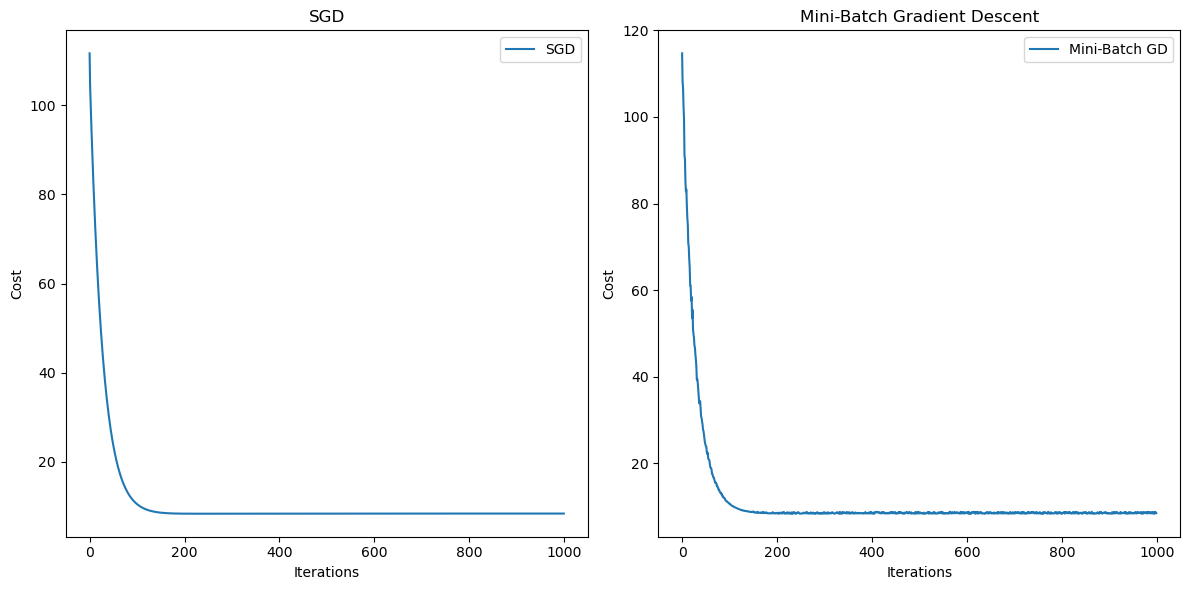

In [45]:
x_train_reshaped = X_train.values.reshape(-1, 1)
x_test_reshaped = X_test.values.reshape(-1, 1)
learning_rate = 0.01
max_iter = 1000  
batch_size = 4   
sgd_regressor_sgd = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=learning_rate, warm_start=True)
sgd_regressor_mbgd = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=learning_rate, warm_start=True)

cost_history_sgd = []
cost_history_mbgd = []


for _ in range(max_iter):
    for i in range(len(x_train_reshaped)):
        x_batch = x_train_reshaped[i:i+1] 
        y_batch = Y_train.iloc[i:i+1]
        sgd_regressor_sgd.fit(x_batch, y_batch)
    cost = mean_squared_error(Y_train, sgd_regressor_sgd.predict(x_train_reshaped))
    cost_history_sgd.append(cost)


for _ in range(max_iter):

    for i in range(0, len(x_train_reshaped), batch_size):
        x_batch = x_train_reshaped[i:i+batch_size] 
        y_batch = Y_train.iloc[i:i+batch_size]

        sgd_regressor_mbgd.fit(x_batch, y_batch)
    cost = mean_squared_error(Y_train, sgd_regressor_mbgd.predict(x_train_reshaped))
    cost_history_mbgd.append(cost)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cost_history_sgd, label="SGD")
plt.title("SGD")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(cost_history_mbgd, label="Mini-Batch GD")
plt.title("Mini-Batch Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
#Exercise 2

In [47]:
df = pd.read_csv("Boston.csv")

print(df.head())
df.columns = df.columns.str.strip()

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


In [48]:
correlations = df.corr()
top_5_features = correlations['medv'].nlargest(6).index[1:]
print("Top 5 features based on correlation with 'MEDV':")
print(top_5_features)

Top 5 features based on correlation with 'MEDV':
Index(['rm', 'zn', 'black', 'dis', 'chas'], dtype='object')


In [49]:
from sklearn.linear_model import LinearRegression
best_3_features = top_5_features[:3]
x = df[best_3_features]
y = df['medv']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 73)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE): ", rmse)
print("R Squared (Coefficient of Determination): ", r2)

Root Mean Squared Error (RMSE):  5.191368184173811
R Squared (Coefficient of Determination):  0.46535165073905427
